In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
df_sales = pd.read_csv("data_files/t_sales.csv")
sales = pd.DataFrame(df_sales)

df_branches = pd.read_csv("data_files/t_branches.csv")
branches = pd.DataFrame(df_branches)

df_products = pd.read_csv("data_files/t_products.csv")
products = pd.DataFrame(df_products)

df_cities = pd.read_csv("data_files/t_cities.csv")
cities = pd.DataFrame(df_cities)


In [10]:
sales.rename(columns = {"Unnamed: 0" : "Index", "Филиал" : "Ссылка"}, inplace = True)
#sales.set_index("Index", inplace = True)


In [9]:
branches.rename(columns = {"Unnamed: 0" : "Index"}, inplace = True)
df_branches.fillna('', inplace=True)

def determine_building_type(first, second):
    
    pattern = re.compile(r'\b[сc][кk][лl][аa][дd]\b', re.IGNORECASE)

    if pattern.search(first) or pattern.search(second):
        return "Склад"
    else:
        return "Магазин"
    
branches['Тип'] = branches.apply(lambda row: determine_building_type(row['Наименование'], row['КраткоеНаименование']), axis=1)


In [11]:
merged_b_s = pd.merge(sales, branches, on = "Ссылка")

#Здесь топ 10 склад и магазинов по количеству продаж
sales_number_types = merged_b_s.groupby(["Тип", "Ссылка", "Наименование"])["Количество"].sum().reset_index()
warehouses_sales = sales_number_types[sales_number_types["Тип"] == "Склад"]
shops_sales = sales_number_types[sales_number_types["Тип"] == "Магазин"]
shops_sales_ten = shops_sales.sort_values(by = "Количество", ascending = False).head(10).reset_index()
warehouses_sales_ten = warehouses_sales.sort_values(by = "Количество", ascending = False).head(10).reset_index()
print(shops_sales_ten)
print(warehouses_sales_ten)


   index      Тип                                Ссылка  \
0    176  Магазин  aa07cc40-1ce6-11de-93ad-00151716f9f5   
1    217  Магазин  d12ce9c9-b38a-11de-bd70-00151716f9f5   
2    110  Магазин  74233663-bb9e-11da-ab47-0002b3552d75   
3    253  Магазин  ed377845-e7a8-11dd-aaaf-00151716f9f5   
4     77  Магазин  5693a671-acdd-11db-a08d-00001a1933df   
5      0  Магазин  01ca53c3-ff02-11dd-a0a4-00151716f9f5   
6    242  Магазин  e4bdd48f-ff7f-44dd-85dc-3d1bc03f0579   
7    128  Магазин  84ae0279-028f-4bd6-a842-b93296b6f3e4   
8     43  Магазин  3379f43a-71a4-11de-a93c-00151716f9f5   
9     49  Магазин  3791c104-6d8e-4945-9b60-e48e9cdc7d01   

                 Наименование  Количество  
0           Новосиб Ватутина      94624.0  
1     Ростов Красноармейская      79159.0  
2  яВладивосток  Луговая МБТ      74879.0  
3          Омск  на Гагарина      70353.0  
4   яКомсомольск Аллея Труда      66382.0  
5                ЕКБ Вайнера      63229.0  
6  яН.Новгород Пл. Революции      63049.0 

In [12]:
#здесь топ-10 товаров по продажам на складах и магазинах
pattern = r"доставка|отгрузка|обработка"

products.rename(columns = {"Ссылка" : "Номенклатура"}, inplace = True)
merged_b_s_p = pd.merge(merged_b_s, products, on = "Номенклатура")
sales_check = pd.merge(sales, products, on = "Номенклатура")


merged_b_s_p = merged_b_s_p[~merged_b_s_p["Наименование_y"].str.contains(pattern, case=False, regex = True)]
products_sales = merged_b_s_p.groupby(["Номенклатура", "Наименование_y", "Тип"])["Количество"].sum().reset_index()
warehouses_products = products_sales[products_sales["Тип"] == "Склад"]
shops_products = products_sales[products_sales["Тип"] == "Магазин"]
warehouses_products_top_ten = warehouses_products.sort_values(by = "Количество", ascending = False).head(10).reset_index()
shops_products_top_ten = shops_products.sort_values(by = "Количество", ascending = False).head(10).reset_index()

print(warehouses_products_top_ten)
print(shops_products_top_ten)

   index                          Номенклатура  \
0  10841  8bc9dc6e-59b1-11e0-b259-001517c526f0   
1  10819  8bc9dc56-59b1-11e0-b259-001517c526f0   
2   1845  1949765c-76c8-11e0-8e92-001517c526f0   
3   2535  225d49b0-e26f-11e0-bdbc-001517c526f0   
4   4746  3cf320fc-da86-11e0-bf16-001517c526f0   
5  10592  885de33a-7a1f-11dd-9999-00151716f9f5   
6  11126  8f715623-135e-11e1-a03b-001517c526f0   
7  12324  9f05c7b5-6b57-11de-af5d-00151716f9f5   
8  11431  937c3d74-e313-11da-9c95-0002b3552d75   
9  14450  ba23d7ea-b4eb-11e0-9c16-00155d030b07   

                                      Наименование_y    Тип  Количество  
0  Телевизор LED 32" (81 см) Samsung UE32D5000 [F...  Склад         7.0  
1  Телевизор LED 40" (101 см) Samsung UE40D8000 [...  Склад         2.0  
2  Видеокарта PCI-E HIS AMD Radeon HD6750 1024MB ...  Склад         1.0  
3  Фонарь ЭРА K24 [кемпинговый фонарь, 24хLED, 3xAA]  Склад         1.0  
4  Считыватель DNS/Air Tone AT-CR02 [SD/MMC/CF/MS...  Склад         1.0  
5    

In [ ]:
#merged_b_s_c = pd.merge()

cities.rename(columns = {"Ссылка" : "Город"}, inplace = True)
merged_b_s_c = pd.merge(cities, merged_b_s, on = "Город")
cities_sales = merged_b_s_c.groupby(["Наименование_x"])["Количество"].sum().reset_index()
cities_sales.rename(columns = {"Наименование_x" : "Город"}, inplace = True)
cities_sales = cities_sales.sort_values(by = "Количество", ascending = False).head(10)
cities_sales.reset_index()


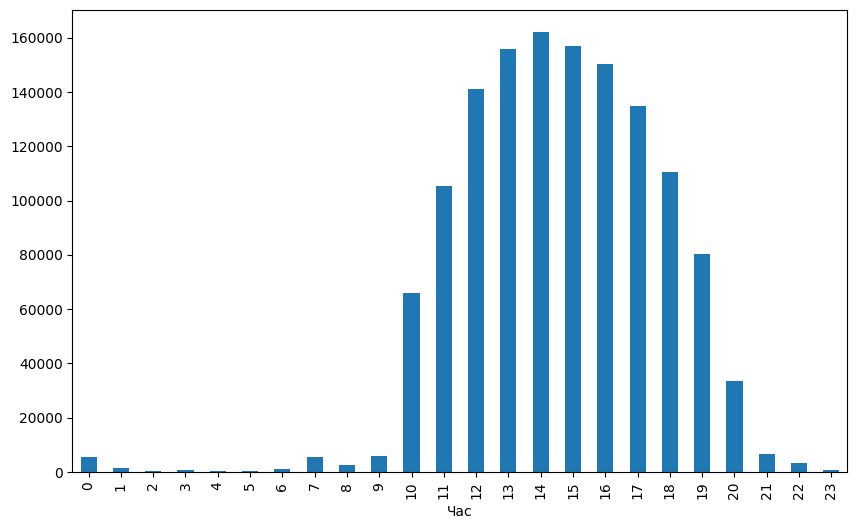

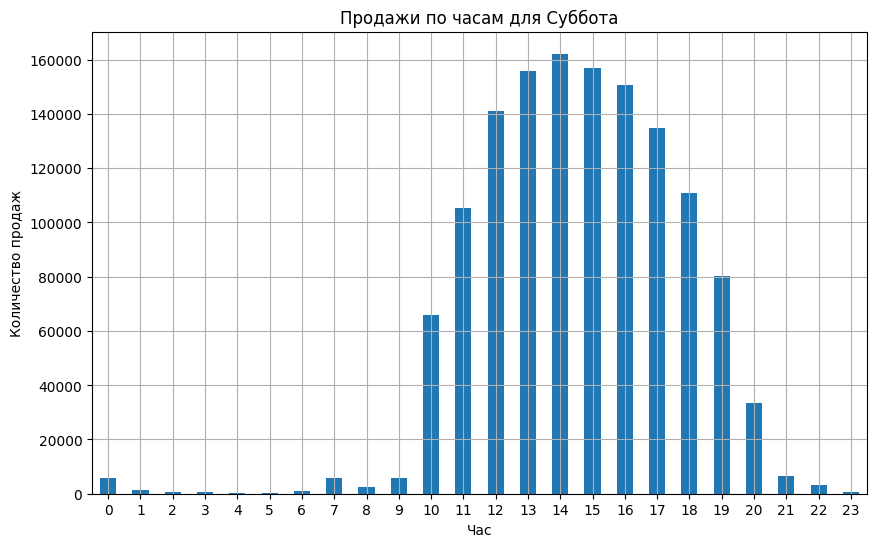

In [4]:

sales["Период"] = pd.to_datetime(sales["Период"])
sales["Час"] = sales["Период"].dt.hour
sales["День недели"] = sales["Период"].dt.dayofweek

sales_hours = sales.groupby("Час")["Количество"].sum().reset_index()
sales_days = sales.groupby("День недели")["Количество"].sum().reset_index()
pivot_table = sales.pivot_table(values='Количество', index='День недели', columns='Час', aggfunc='sum', fill_value=0)
max_sales_day = pivot_table.sum(axis=1).idxmax()
sales_for_max_day = pivot_table.loc[max_sales_day]
plt.figure(figsize=(10, 6))
sales_for_max_day.plot(kind='bar')
days_of_week = {0: 'Понедельник', 1: 'Вторник', 2: 'Среда', 3: 'Четверг', 4: 'Пятница', 5: 'Суббота', 6: 'Воскресенье'}


pivot_table.rename(index=days_of_week, inplace=True)

sales_for_max_day = pivot_table.loc[days_of_week[max_sales_day]]
plt.figure(figsize=(10, 6))
sales_for_max_day.plot(kind='bar')
plt.title(f'Продажи по часам для {days_of_week[max_sales_day]}')
plt.xlabel('Час')
plt.ylabel('Количество продаж')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [29]:
sales_and_products = merged_b_s_p.groupby(["Номенклатура"])["Количество"].sum().reset_index()
quantile_0_3 = sales_and_products['Количество'].quantile(0.3)
quantile_0_9 = sales_and_products['Количество'].quantile(0.9)

def classify_product(row):
    if row['Количество'] > quantile_0_9:
        return 'Верхний квантиль (0.9)'
    elif row['Количество'] > quantile_0_3:
        return 'Средний квантиль (0.3 - 0.9)'
    else:
        return 'Нижний квантиль (0.3)'

sales_and_products['Класс'] = sales_and_products.apply(classify_product, axis=1)
sales_and_products = sales_and_products.sort_values(by = "Количество", ascending = False).reset_index()
sales_and_products = sales_and_products.drop(columns = ["index"])

sales_and_products.to_csv('data_files/sales_and_products_result.csv', index=False)
